## Importing the libraries

In [1]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

2022-07-24 11:14:57.645642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-24 11:14:57.645684: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!pip install opencv-python


     |████████████████████████████████| 60.9 MB 56 kB/s  eta 0:00:01
You should consider upgrading via the '/home/sara/Documents/python/mlvenv/bin/python -m pip install --upgrade pip' command.


## Importing the dataset

In [63]:
X_train, y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
 
X_test, y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

X_remaining, y_remaining = read_hoda_dataset(dataset_path='RemainingSamples.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

In [68]:
X_train.shape

(60000, 32, 32)

In [66]:
y_train.shape

(60000,)

In [13]:
n_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, n_classes)
y_test_cat = keras.utils.to_categorical(y_test,n_classes)
y_remaining_cat = keras.utils.to_categorical(y_remaining,n_classes)
y_train_cat.shape

(60000, 10)

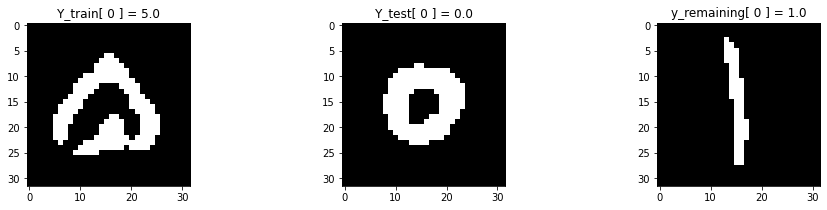

In [15]:
fig = plt.figure(figsize=(16, 3))
fig.add_subplot(1, 3, 1)
plt.title('Y_train[ 0 ] = ' + str(y_train[1]))
plt.imshow(X_train[1].reshape([32, 32]), cmap='gray')

fig.add_subplot(1, 3, 2)
plt.title('Y_test[ 0 ] = ' + str(y_test[0]))
plt.imshow(X_test[0].reshape([32, 32]), cmap='gray')

fig.add_subplot(1, 3, 3)
plt.title('y_remaining[ 0 ] = ' + str(y_remaining[1]))
plt.imshow(X_remaining[1].reshape([32, 32]), cmap='gray')

plt.show()

## Flatten operation 

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 32*32)
X_test_flattened = X_test.reshape(len(X_test), 32*32)

X_train_flattened.shape

(60000, 1024)

## Prepare and Fit a model using Keras

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10


2022-07-22 00:11:25.509896: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 245760000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.1369 - accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0045 - accurac

## Evaluating model using test set

In [18]:
model.evaluate(X_test_flattened, y_test)

2022-07-22 00:12:33.005498: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 81920000 exceeds 10% of free system memory.


625/625 [==============================] - 2s 3ms/step - loss: 0.1145 - accuracy: 0.9776


[0.11451797187328339, 0.9775500297546387]

In [19]:
model.evaluate(X_remaining, y_remaining)

699/699 [==============================] - 2s 3ms/step - loss: 0.0947 - accuracy: 0.9812


[0.09465115517377853, 0.9812097549438477]

## Predicting test lable

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted.shape

625/625 [==============================] - 2s 3ms/step


(20000, 10)

## Funny test

3

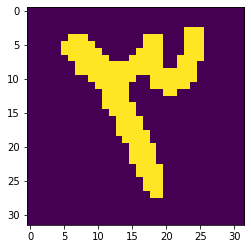

In [22]:
plt.imshow(X_test[6353].reshape([32,32]))
np.argmax(y_predicted[6353])

## Confusionmatrix

In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1978,    0,    0,    1,    1,   15,    2,    3,    0,    0],
       [   1, 1991,    1,    0,    3,    0,    2,    2,    0,    0],
       [   0,    6, 1951,   32,    3,    0,    4,    2,    0,    2],
       [   4,    0,   66, 1896,   28,    2,    1,    1,    2,    0],
       [   2,    2,   22,   56, 1904,    4,    2,    2,    1,    5],
       [   8,    4,    2,    0,   15, 1961,    1,    4,    5,    0],
       [   1,    4,    7,    3,    4,    6, 1942,    3,    2,   28],
       [   1,    5,   11,    0,    1,    7,    3, 1972,    0,    0],
       [   0,    6,    0,    0,    3,   30,    2,    0, 1946,   13],
       [   1,   23,    3,    1,    3,    2,   15,    0,    8, 1944]],
      dtype=int32)>

## Confusionmatrix with swabord

Text(69.0, 0.5, 'Truth')

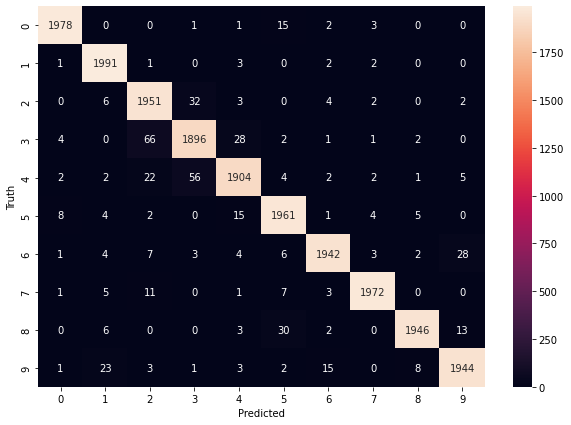

In [13]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing model using external sample

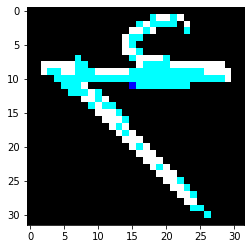

In [14]:
original_img = cv2.imread("Test_image/4.jpg")
resized_img = cv2.resize(original_img, (32, 32))

resultNot = cv2.bitwise_not(src=resized_img, dst=resized_img)
(thresh, blackAndWhiteImage) = cv2.threshold(resultNot, 127, 255, cv2.THRESH_BINARY)
_, _, final_result = cv2.split(blackAndWhiteImage)
final_result = final_result / 255
cv2.cvtColor(blackAndWhiteImage, cv2.COLOR_BGR2RGB)
plt.imshow(blackAndWhiteImage,)

In [15]:
final_result_flattened = final_result.reshape(1, 32*32)
input_y_predicted = model.predict([final_result_flattened])
np.argmax(input_y_predicted)

4

In [ ]:
"""Sequential API"""

In [23]:
from tensorflow.keras.layers import Dense
model=keras.Sequential()
model.add(Dense(50,activation='relu',input_shape=(1024,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(X_train,y_train_cat,epochs=25,batch_size=40,validation_split=0.2)

Epoch 1/25
1200/1200 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9898 - val_loss: 0.1828 - val_accuracy: 0.9784
Epoch 2/25
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0421 - accuracy: 0.9919 - val_loss: 0.2072 - val_accuracy: 0.9810
Epoch 3/25
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0374 - accuracy: 0.9921 - val_loss: 0.2262 - val_accuracy: 0.9783
Epoch 4/25
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0495 - accuracy: 0.9904 - val_loss: 0.2254 - val_accuracy: 0.9796
Epoch 5/25
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0349 - accuracy: 0.9924 - val_loss: 0.2160 - val_accuracy: 0.9823
Epoch 6/25
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0416 - accuracy: 0.9926 - val_loss: 0.2733 - val_accuracy: 0.9793
Epoch 7/25
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0370 - accuracy: 0.9922 - val_loss: 0.2581 - val_accuracy:

In [28]:
model.evaluate(X_test,y_test_cat)

625/625 [==============================] - 1s 2ms/step - loss: 0.6715 - accuracy: 0.9602


[0.6715288758277893, 0.9601500034332275]

In [31]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],  color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'], color=colors[n], label='Val '+label, 
                       linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('loss')
  
    plt.legend()

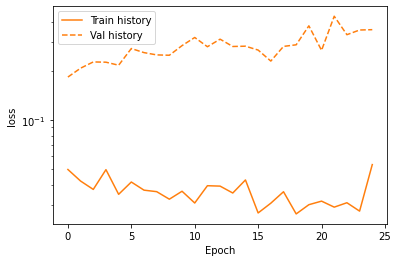

In [32]:
plot_loss(history, "history", 1)

In [33]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_accuracy(history, label, n):
  # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['accuracy'],  color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_accuracy'], color=colors[n], label='Val '+label, 
                       linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
  
    plt.legend()

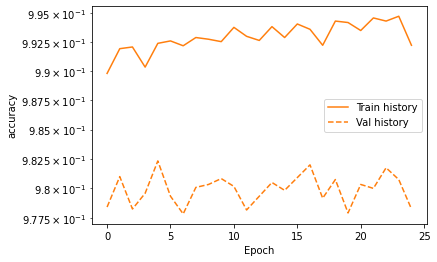

In [34]:
plot_accuracy(history, "history", 1)

In [ ]:
"""Functional API"""

In [36]:
visible = keras.layers.Input(shape=(1024,))
hidden1 = Dense(50, activation='relu')(visible)
hidden2 = Dense(50, activation='relu')(hidden1)
output = Dense(10, activation='sigmoid')(hidden2)
model = keras.models.Model(inputs=visible, outputs=output)
 

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, batch_size=64, epochs=20,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0793 - accuracy: 0.9775 - val_loss: 0.0810 - val_accuracy: 0.9778
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0558 - accuracy: 0.9836 - val_loss: 0.0717 - val_accuracy: 0.9793
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0661 - val_accuracy: 0.9810
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0627 - val_accuracy: 0.9828
Epoch 6/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0689 - val_accuracy: 0.9820
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0616 - val_accuracy: 0.9832
Epoch 

In [38]:
!pip install keras-tuner

     |████████████████████████████████| 135 kB 458 kB/s eta 0:00:01
You should consider upgrading via the '/home/sara/Documents/python/mlvenv/bin/python -m pip install --upgrade pip' command.


In [85]:
import keras_tuner as kt

In [42]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      hp.Choice('units', [20,30, 60]),
      activation='relu'))
    model.add(keras.layers.Dense(10, activation='sigmoid'))
    model.compile(loss='mse')
    return model


In [43]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)


In [45]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test_cat))
best_model = tuner.get_best_models()[0]


Trial 3 Complete [00h 00m 29s]
val_loss: 20.4133243560791

Best val_loss So Far: 20.409900665283203
Total elapsed time: 00h 01m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
"""CNN"""

In [44]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
X_train=X_train.reshape(60000,32,32)

In [69]:
X_train.shape

(60000, 32, 32)

In [70]:
y_train.shape

(60000,)

In [75]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=3,batch_size=70)
# score = model.evaluate(X_test, y_test)


Epoch 1/3
858/858 [==============================] - 98s 112ms/step - loss: 0.0319 - accuracy: 0.9909
Epoch 2/3
858/858 [==============================] - 87s 102ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 3/3
858/858 [==============================] - 98s 115ms/step - loss: 0.0127 - accuracy: 0.9962


ValueError: in user code:

    File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/keras/engine/training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 32, 32, 1), found shape=(32, 1024)


In [76]:
X_test.shape

(20000, 1024)

In [77]:
X_test=X_test.reshape(20000,32,32)

In [78]:
y_test.shape

(20000,)

In [79]:
score = model.evaluate(X_test, y_test)

625/625 [==============================] - 11s 15ms/step - loss: 0.0383 - accuracy: 0.9895


In [ ]:
"""sub class API with CNN"""

In [90]:
from kerastuner import HyperModel
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D
)

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=self.input_shape))
                
        model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
      
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
    
        model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
       

        model.add(Flatten())
        model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32,default=128),activation=hp.Choice(
                    'dense_activation',values=['relu',  'sigmoid'],default='relu')))
  
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling='LOG',
                    default=1e-3)),loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
        return model

hypermodel = CNNHyperModel(input_shape=(32,32,1), num_classes=10)

In [91]:

tuner = kt.RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    directory='random_search',
    project_name='persain_handwritting'
)

In [92]:
tuner.search(X_train, y_train, epochs=3, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 03m 34s]
val_accuracy: 0.9770500063896179

Best val_accuracy So Far: 0.9879999756813049
Total elapsed time: 00h 20m 43s
INFO:tensorflow:Oracle triggered exit


In [106]:
tuner.get_best_hyperparameters()

In [111]:

summary = tuner.results_summary()

Results summary
Results in random_search/persain_handwritting
Showing 10 best trials
Trial summary
Hyperparameters:
dropout_1: 0.30000000000000004
units: 352
dense_activation: relu
learning_rate: 0.0015717490429428354
Score: 0.9879999756813049
Trial summary
Hyperparameters:
dropout_1: 0.2
units: 128
dense_activation: relu
learning_rate: 0.002009550623626266
Score: 0.9863499999046326
Trial summary
Hyperparameters:
dropout_1: 0.2
units: 160
dense_activation: sigmoid
learning_rate: 0.0024271328536722074
Score: 0.9833499789237976
Trial summary
Hyperparameters:
dropout_1: 0.05
units: 64
dense_activation: relu
learning_rate: 0.00010965584978946162
Score: 0.982200026512146
Trial summary
Hyperparameters:
dropout_1: 0.4
units: 96
dense_activation: relu
learning_rate: 0.009115992223276017
Score: 0.9770500063896179
